In [1]:
# 引入相关依赖的包
# 防止不必要的警告
import warnings
warnings.filterwarnings("ignore")
# 引入数据科学基础包
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
# 引入机器学习，预处理，模型选择，评估指标
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# 引入本次所使用的波士顿数据集
from sklearn.datasets import load_boston
# 引入算法
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
# 载入波士顿房价数据集
boston = load_boston()
# x 是特征， y 是标签
x = boston.data
y = boston.target
# 查看相关属性
print('特征的列名')
print(boston.feature_names)
print("样本数据量:%d, 特征个数： %d" % x.shape)
print("target 样本数据量:%d" % y.shape[0])

特征的列名
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
样本数据量:506, 特征个数： 13
target 样本数据量:506


In [2]:
#显示数据集
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston['target']
print(df.head())
print(df)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458

In [3]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)
# 标准化数据集
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train[0:100]

array([[-0.35451414, -0.49503678, -0.15692398, ..., -0.01188637,
         0.42050162, -0.29153411],
       [-0.38886418, -0.49503678, -0.02431196, ...,  0.35398749,
         0.37314392, -0.97290358],
       [ 0.50315442, -0.49503678,  1.03804143, ...,  0.81132983,
         0.4391143 ,  1.18523567],
       ...,
       [-0.34444751, -0.49503678, -0.15692398, ..., -0.01188637,
         0.4391143 , -1.11086682],
       [-0.39513036,  2.80452783, -0.87827504, ...,  0.35398749,
         0.4391143 , -1.28120919],
       [-0.38081287,  0.41234349, -0.74566303, ...,  0.30825326,
         0.19472652, -0.40978832]])

The r2 score of LinearRegression on test is:   0.5637001922866861
msetest:   30.21478156220577
The r2 score of LinearRegression on train is:   0.7712199606364578
msetrain:   20.096107509249354
岭回归-权重系数为：
 [-0.84142063  0.96084881  0.2713002   0.63919243 -1.88267678  3.21326902
 -0.09353583 -2.69920513  2.34170972 -1.87950377 -2.20279801  0.91117699
 -3.42624957]
岭回归-偏置为：
 22.81980198019807
[29.8 50.  20.9 10.4 48.3  7.2 25.2 14.5 20.8 23.8 13.5 24.6 15.7 20.3
 22.2 19.4 13.3 16.6 20.1 29.8 36.2 21.9 17.7 24.  14.4  7.2 23.2 21.8
 22.  19.6 13.6 18.2 19.4 15.4 19.6 15.  23.3 27.5 33.4 23.6 22.2 25.
 12.5 23.1 20.  16.6 28.7 17.2 50.  22.5 50.  23.3 21.7 27.5 16.  14.9
 31.7 24.3 24.1 24.8 19.9 19.1 13.8 23.3 22.7 32.7 13.3 10.8 19.1 24.4
 21.6  8.8 13.4 16.2 21.7 27.1 12.1 17.1 12.7 23.4 18.9 20.7 24.1 25.
 28.2 23.9 22.9 23.4 19.3 15.6 18.3 19.8  5.  15.6 36.2 22.  22.   9.7
 27.5 23.9  8.3 19.4]


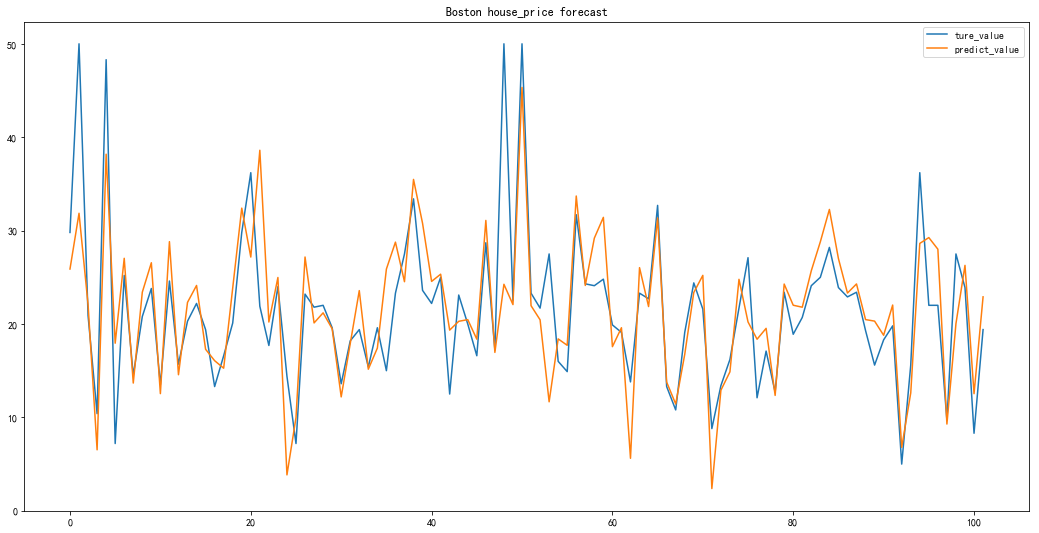

In [4]:
#***********调用回归模型，完成模型训练和数据预测，可选回归模型有LinearRegression回归、岭回归、Lasso回归等
lr = Ridge() #选择线性回归模型，以LinearRegression为例，可自行选择其他回归模型，使房价预测拟合效果更好
#lr = LinearRegression()
#lr = Lasso()

lr.fit(x_train,y_train) #模型的训练
lr_y_predict = lr.predict(x_test) #用训练好的模型对测试集数据进行预测
lr_y_train_predict = lr.predict(x_train)#查看训练集上房价拟合的结果
#***********（1）计算测试集上的R2评分和均方误差(mse)：
r2_score2 = r2_score(y_test,lr_y_predict)
mean_squared_error2 = mean_squared_error(y_test,lr_y_predict)

print("The r2 score of LinearRegression on test is:  ",r2_score2)
print("msetest:  ",mean_squared_error2)

#***********（2）计算训练集上的R2评分和均方误差(mse)：
r2_score1 = r2_score(y_train,lr_y_train_predict)
mean_squared_error1 = mean_squared_error(y_train,lr_y_train_predict)

print("The r2 score of LinearRegression on train is:  ",r2_score1)
print("msetrain:  ",mean_squared_error1)

#***********（3）得出所选回归模型的回归系数(线性回归模型的权重)：
print("岭回归-权重系数为：\n", lr.coef_)
#lr.intercept_ = 20
print("岭回归-偏置为：\n", lr.intercept_)

#*********** （4）可视化测试集上房价预测的结果与对应的真实房价：
print(y_test)
x = np.arange(0., 102, 1)

plt.figure(figsize=(18, 9))
plt.plot(x, y_test, label = "ture_value")
plt.plot(x, lr_y_predict, label = "predict_value")
plt.title("Boston house_price forecast")
plt.legend(loc='best')
plt.show()  # 让图例生效


正规方程-权重系数为：
 [-0.85089563  0.97671862  0.30111583  0.63479002 -1.91629559  3.20786347
 -0.08594078 -2.72561293  2.41857379 -1.95066585 -2.21288273  0.91253527
 -3.43720856]
正规方程-偏置为：
 22.81980198019807
预测房价：
 [25.91492184 31.89826125 22.04948817  6.52018639 38.20415666 17.95231968
 27.0602557  13.64465123 23.40233962 26.58289147 12.53559724 28.8288364
 14.65900863 22.41388584 24.14209649 17.29197006 16.10690724 15.23043908
 23.87307512 32.40163016 27.20203318 38.59209685 20.2185019  25.0069918
  3.80753792  9.96570572 27.20459046 20.08950962 21.15996286 19.46853777
 12.16545468 17.8763363  23.54368907 15.10123786 17.39603189 25.89806515
 28.78411923 24.50103891 35.55199229 30.77254315 24.56715308 25.35792175
 19.36319951 20.25162344 20.47271482 18.37922603 31.07513135 16.98672906
 24.30626982 22.07534216 45.37061487 21.959485   20.41230872 11.71854449
 18.42545467 17.7156559  33.73426096 24.15747069 29.19270036 31.41629062
 17.5845958  19.63016916  5.63246263 25.9920698  21.84228791 31

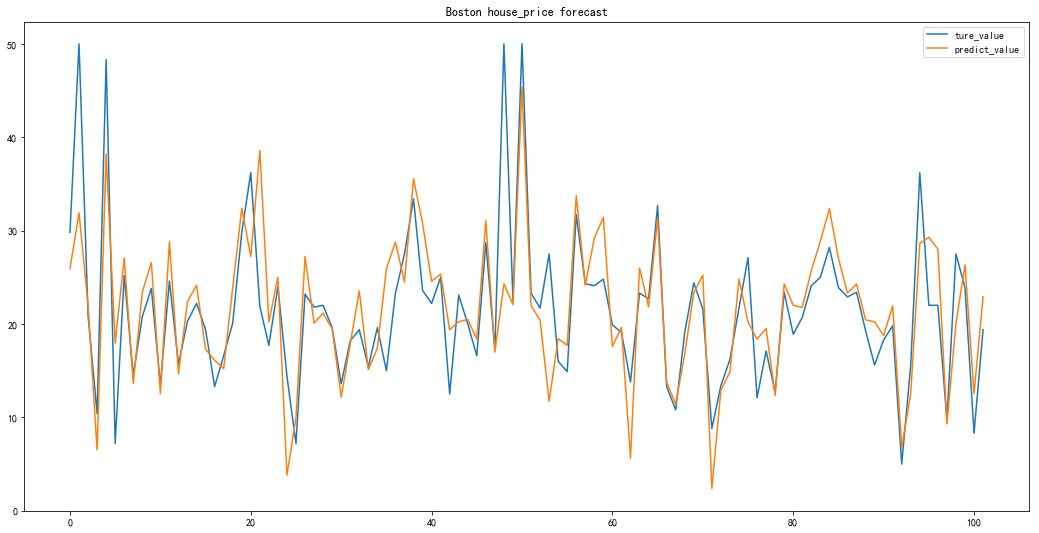

In [5]:
#***********（1）用正规方程法求解出线性回归系数，并根据线性回归的模型Y=X*W+b预测房价

lr = LinearRegression()
lr.fit(x_train, y_train)

print("正规方程-权重系数为：\n", lr.coef_)
print("正规方程-偏置为：\n", lr.intercept_)

y_predict = lr.predict(x_test)
print("预测房价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("正规方程-均方误差为：\n", error)

#***********（2）计算预测房价与实际房价之间的均方误差和R2评分
r2_score3 = r2_score(y_test, y_predict)
mean_squared_error3 = mean_squared_error(y_test, y_predict)

print(r2_score3)
print(mean_squared_error3)

#*********** （3）可视化测试集上房价预测的结果与对应的真实房价：
print(y_test)
x = np.arange(0., 102, 1)

plt.figure(figsize=(18, 9))
plt.plot(x, y_test, label = "ture_value")
plt.plot(x, y_predict, label = "predict_value")
plt.title("Boston house_price forecast")
plt.legend(loc='best')
plt.show()  # 让图例生效


In [6]:
df = pd.DataFrame ({'实际房价': y_test, '预测房价': lr_y_predict})
print(df)


     实际房价       预测房价
0    29.8  25.885331
1    50.0  31.854889
2    20.9  22.082788
3    10.4   6.529155
4    48.3  38.179043
5     7.2  17.943482
6    25.2  27.033016
7    14.5  13.676380
8    20.8  23.404505
9    23.8  26.556737
10   13.5  12.543987
11   24.6  28.815656
12   15.7  14.567861
13   20.3  22.313612
14   22.2  24.125284
15   19.4  17.292669
16   13.3  16.072364
17   16.6  15.264128
18   20.1  23.852614
19   29.8  32.403838
20   36.2  27.166704
21   21.9  38.601151
22   17.7  20.211421
23   24.0  24.978384
24   14.4   3.844781
25    7.2   9.979734
26   23.2  27.171844
27   21.8  20.114941
28   22.0  21.193289
29   19.6  19.492089
..    ...        ...
72   13.4  12.902130
73   16.2  14.879155
74   21.7  24.781684
75   27.1  20.220725
76   12.1  18.368221
77   17.1  19.532778
78   12.7  12.353155
79   23.4  24.275885
80   18.9  22.009532
81   20.7  21.796672
82   24.1  25.703089
83   25.0  28.804600
84   28.2  32.263882
85   23.9  27.007293
86   22.9  23.313992
87   23.4  24